# **1. Setup and Load Data**
---

## 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib filetype

In [2]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.3.1
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.17.0
altair                            5.5.0
anaconda-anon-usage               0.7.1
anacond

In [2]:
import tensorflow as tf
import os
# os - used to navigate through file structures, returns the appropriate folder format for your os
# os.path.join('data','happy') returns 'data\happy'
# os.listdir('data') returns everything from the directory 'data

## 1.2 Remove dodgy images

In [3]:
import cv2
# opencv
import filetype
# allows us to check the file extensions for the images
from matplotlib import pyplot as plt

In [5]:
data_dir = 'data'

In [6]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
img = cv2.imread(os.path.join('data','happy','premium_photo-1682546068715-386bd3c676e8.jpeg'))

In [8]:
# type(img)
# numpy array

In [9]:
# img.shape
# (5464, 8192, 3) = (height in pixels, width in pixels, 3-coloured)

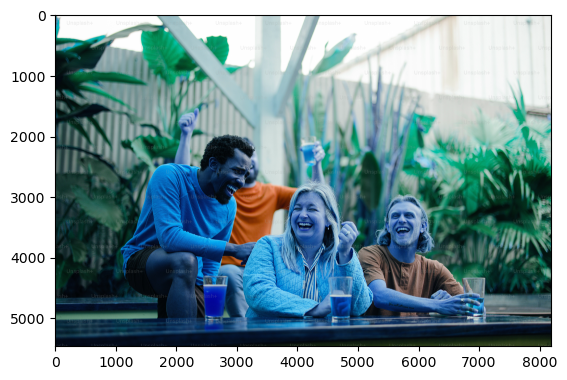

In [5]:
plt.imshow(img)

In [11]:
for folder in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, folder)):
        image_path = os.path.join(data_dir, folder, image)
        try:
            img = cv2.imread(image_path)
            kind = filetype.guess(image_path)
            if kind.extension not in image_extensions:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            #os.remove(image_path)

## 1.3 Load Data

In [6]:
import numpy as np

In [6]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')
# builds an image dataset

Found 170 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
len(batch)
# 2 parts to the dataset: 
# - the images (images represented as numpy arrays)
# - the labels
batch[1]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

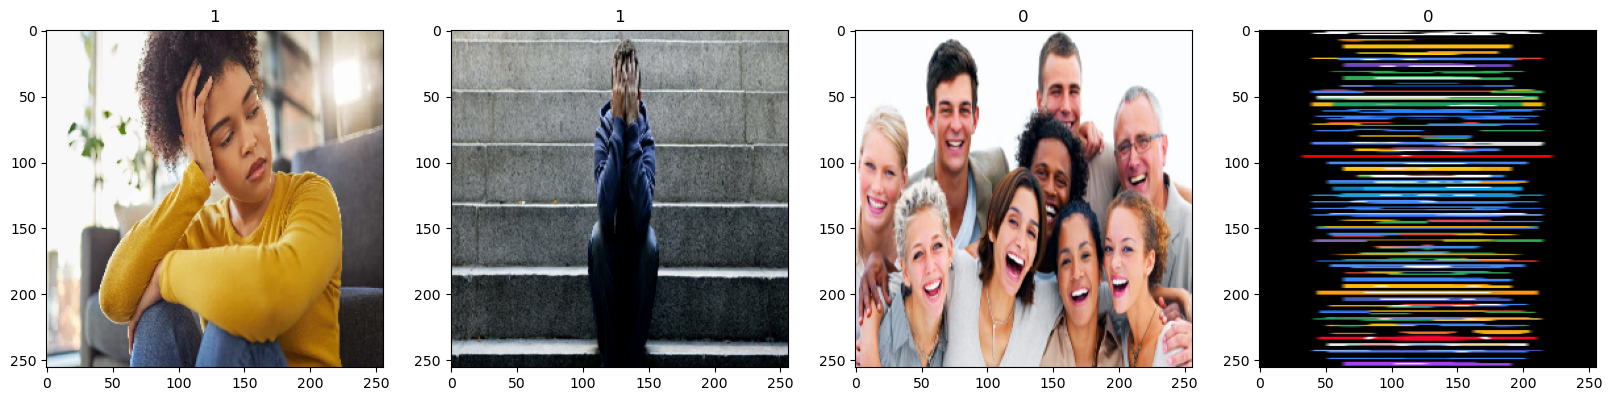

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# 1 - sad
# 0 - happy

# **2. Preprocess Data**
---

## 2.1 Scale Data

In [19]:
data = data.map(lambda x, y: (x/255, y))
# x = batch[0] (images)

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

np.float32(1.0)

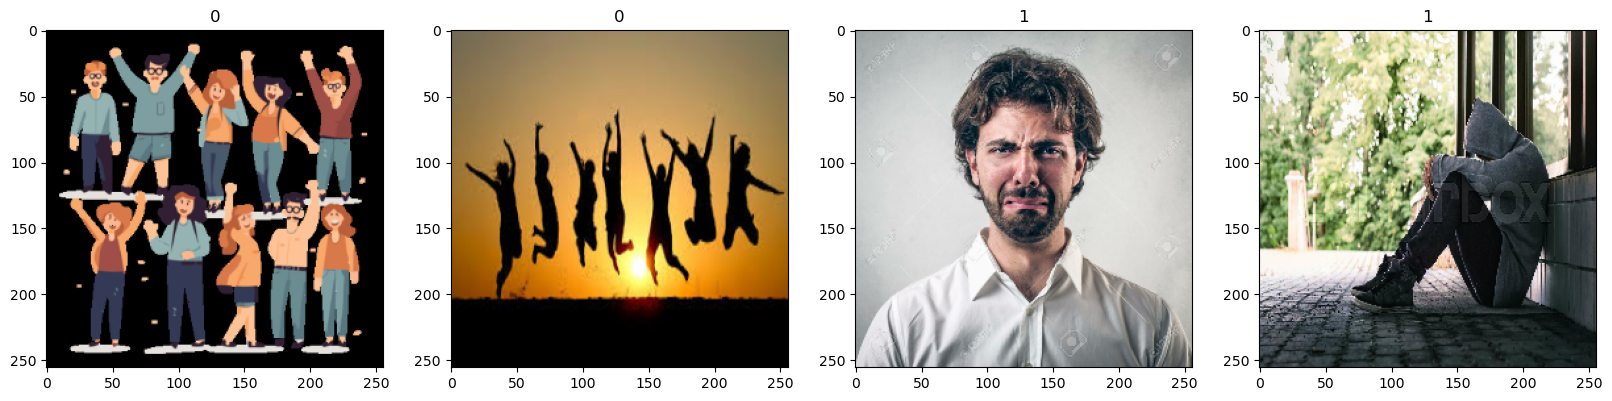

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [24]:
# split data into a training and testing partition
len(data)

6

In [25]:
train_size = int(len(data)*0.7) # training size 70% - used to train the deep learning model
val_size = int(len(data)*0.2) # validation size 20% - used to evaluate the model while training it
test_size = int(len(data)*0.1)+1 # testing size 10% - used to test the model after training

In [26]:
test_size+train_size+val_size

6

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
len(test)

1

# **3. Deep Model**
---

## 3.1 Build Deep Learning Model

In [7]:
from tensorflow.keras.models import Sequential
# used to build the model layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Conv2D
- convolutional layer;
- used for image recognition; 
- looks at small patches of the image (3x3) and learns patterns (edges, colors, shapes);

MaxPooling2D
- used to make the images smaller and simpler (reduce the amount of data);
- takes small areas (2x2) and keeps the most important information;
- helps run faster;

Flatten
- flattens data from 2D to 1D;

Dense
- makes the decision;

In [30]:
model = Sequential()

In [31]:
# Conv2D - no. of filters (pattern detectors); filter size; stride;
# activation='relu' -> makes sure the model keeps only positive values
# each layer learns more complex patterns

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# first Conv2D learns edges and corners
# MaxPooling2D reduces size

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# second Conv2D learns shapes (like eyes, leaves, or textures)

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# the model learns 16 filters again, but this time from the already-learned features (combining and refining them)
# gives the network a deeper understanding of the image

model.add(Flatten())
# the image is turned into a collection of small feature maps (2D grids of numbers)
# => turns that 2D data into a 1D list so it can be fed into the final layers that make decisions

model.add(Dense(256, activation='relu'))
# a regular neural network layer that learns combinations of features
# it has 256 neurons; each one learns to recognize certain combinations of patterns
model.add(Dense(1, activation='sigmoid'))
# the final decision layer
# 1 neuron = 1 output value (for binary classification)
# activation='sigmoid' -> turns the output into a number between 0 and 1 (probability of being class 1)
# used for binary classification (two classes)

C:\Users\dragh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

adam
- The Optimizer;
- Adaptive Moment Estimation;
- learning algorithm that adjusts the model’s internal numbers to make better predictions;
- learns quickly and efficiently;

loss
- tells the model how wrong its predictions are
- BinaryCrossentropy is used when we have two classes (binary classification)

metrics
- scores to see while the model trains
- 'accuracy' means how many predictions were correct

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [34]:
logdir = 'logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
# model sees all training data 20 times

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 738ms/step - accuracy: 0.5078 - loss: 2.0131 - val_accuracy: 0.3750 - val_loss: 0.9439
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - accuracy: 0.5078 - loss: 0.7738 - val_accuracy: 0.6250 - val_loss: 0.6486
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 827ms/step - accuracy: 0.6016 - loss: 0.6777 - val_accuracy: 0.5625 - val_loss: 0.6926
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 803ms/step - accuracy: 0.6953 - loss: 0.6767 - val_accuracy: 0.7500 - val_loss: 0.6700
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.7188 - loss: 0.6662 - val_accuracy: 0.6562 - val_loss: 0.6681
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 891ms/step - accuracy: 0.7656 - loss: 0.6433 - val_accuracy: 0.7500 - val_loss: 0.6366
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 905ms/step - accuracy: 0.7188 - loss: 0.6260 - val_accuracy: 0.7500 - val_loss: 0.5796
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 895ms/step - accuracy: 0.7344 - loss: 0.5857 - val_accuracy: 0.7500 - val_loss:

In [38]:
hist.history

{'accuracy': [0.5078125,
  0.5078125,
  0.6015625,
  0.6953125,
  0.71875,
  0.765625,
  0.71875,
  0.734375,
  0.78125,
  0.7578125,
  0.8125,
  0.84375,
  0.8203125,
  0.8359375,
  0.84375,
  0.859375,
  0.875,
  0.8984375,
  0.890625,
  0.9375],
 'loss': [2.0130746364593506,
  0.7738028168678284,
  0.6777366995811462,
  0.6767358779907227,
  0.6662092804908752,
  0.6433405876159668,
  0.6260107755661011,
  0.5857113599777222,
  0.5486617684364319,
  0.5105236768722534,
  0.46590620279312134,
  0.4129565358161926,
  0.40349555015563965,
  0.3720589876174927,
  0.3430075943470001,
  0.3316287398338318,
  0.29937344789505005,
  0.2714712917804718,
  0.25140291452407837,
  0.2198830246925354],
 'val_accuracy': [0.375,
  0.625,
  0.5625,
  0.75,
  0.65625,
  0.75,
  0.75,
  0.75,
  0.75,
  0.8125,
  0.75,
  0.84375,
  0.875,
  0.875,
  0.875,
  0.875,
  1.0,
  0.96875,
  0.90625,
  0.9375],
 'val_loss': [0.943923830986023,
  0.6486332416534424,
  0.6926308870315552,
  0.6700202822685242,

## 3.3 Plot Performance

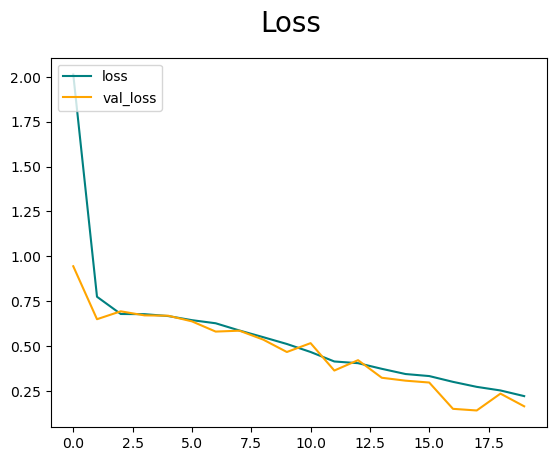

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

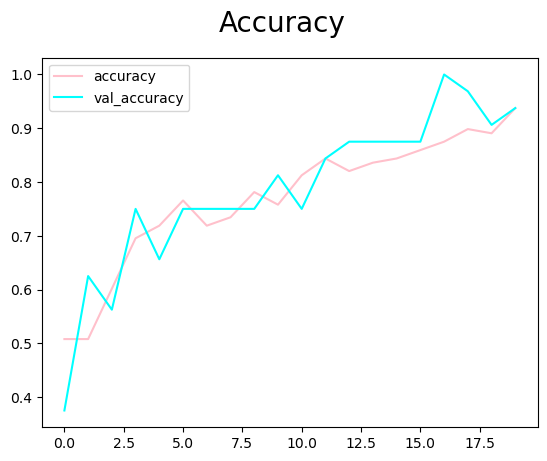

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='pink', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='cyan', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# **4. Evaluate Performance**
---

## 4.1 Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    x, y = batch
    predicted_y = model.predict(x)
    precision.update_state(y, predicted_y)
    recall.update_state(y, predicted_y)
    accuracy.update_state(y, predicted_y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step


In [46]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## 4.2 Test

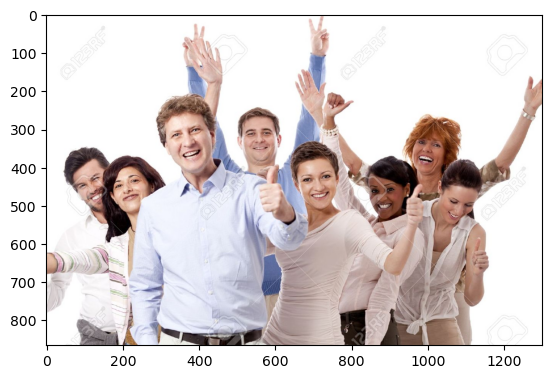

In [57]:
img = cv2.imread('test2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

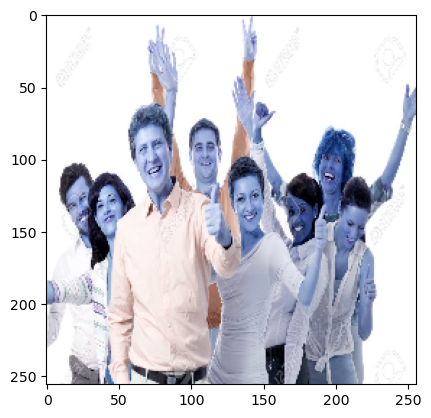

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
resize.shape

TensorShape([256, 256, 3])

In [60]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [61]:
predicted_y = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [62]:
predicted_y

array([[0.02938222]], dtype=float32)

In [63]:
if predicted_y < 0.5:
    print('Predicted class is happy')
else:
    print('Predicted class is sad')

Predicted class is happy


# **5. Save the Model**
---

## 5.1 Save the Model

In [8]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('models','happysadmodel.keras'))

In [9]:
new_model = load_model(os.path.join('models','happysadmodel.keras'))

C:\Users\dragh\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
# model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])